In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert(len(x_train) == len(y_train) == 60000)
assert(len(x_test) == len(y_test) == 10000)

In [3]:
'''
Постобработка данных 
'''
num_classes = 10

# Нормируем значения пикселей до [0, 1]
x_train_processed = x_train.astype('float32') / 255
x_test_processed = x_test.astype('float32') / 255
# Приводим данные к формату (28, 28, 1)
x_train_processed = np.expand_dims(x_train_processed, -1)
x_test_processed = np.expand_dims(x_test_processed, -1)
# print('x_train shape:', x_train_processed.shape)
# print(x_train_processed.shape[0], 'train samples')
# print(x_test_processed.shape[0], 'test samples')

y_train_processed = keras.utils.to_categorical(y_train, num_classes)
y_test_processed = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
'''
Построение модели
'''
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(12, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(12, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(12, kernel_size=(3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense (12, activation ='relu'),
        layers.Dense(num_classes, activation='softmax'),
    ]
)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


2022-01-24 04:44:40.821195: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-01-24 04:44:40.821242: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (desktop): /proc/driver/nvidia/version does not exist
2022-01-24 04:44:40.822580: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 conv2d (Conv2D)             (None, 26, 26, 12)        120       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 12)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 12)        1308      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 12)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 12)          1308      
                                                                 
 flatten (Flatten)           (None, 108)               0         
                                                                 
 dense (Dense)               (None, 12)                1308      
          

In [5]:
'''
Обучяем модель
'''

batch_size = 128
epochs = 15

model.fit(x_train_processed, y_train_processed, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15


2022-01-24 04:44:41.063728: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 169344000 exceeds 10% of free system memory.


422/422 [==============================] - 7s 15ms/step - loss: 0.7749 - accuracy: 0.7462 - val_loss: 0.2459 - val_accuracy: 0.9293
Epoch 2/15
422/422 [==============================] - 8s 19ms/step - loss: 0.2319 - accuracy: 0.9297 - val_loss: 0.1393 - val_accuracy: 0.9583
Epoch 3/15
422/422 [==============================] - 8s 20ms/step - loss: 0.1497 - accuracy: 0.9550 - val_loss: 0.1025 - val_accuracy: 0.9705
Epoch 4/15
422/422 [==============================] - 8s 19ms/step - loss: 0.1182 - accuracy: 0.9643 - val_loss: 0.0857 - val_accuracy: 0.9737
Epoch 5/15
422/422 [==============================] - 9s 21ms/step - loss: 0.1004 - accuracy: 0.9695 - val_loss: 0.0798 - val_accuracy: 0.9747
Epoch 6/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0891 - accuracy: 0.9716 - val_loss: 0.0709 - val_accuracy: 0.9812
Epoch 7/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0814 - accuracy: 0.9747 - val_loss: 0.0686 - val_accuracy: 0.9808
Epoch 8/15

In [6]:
'''
Исполняем обученную модель
'''

score = model.evaluate(x_test_processed, y_test_processed, verbose=0)
print('Точность предсказаний:', score[1])

Test loss: 0.04400048777461052
Test accuracy: 0.9847000241279602


In [13]:
my_x_test = []
my_y_test = np.arange(10)
my_y_test = keras.utils.to_categorical(my_y_test, 10)

digits = list(np.arange(10))
for digit in digits:
    image = ImageOps.grayscale(Image.open(f'{digit}.png'))
    image = ImageOps.fit(image, (28, 28))
    image_arr = np.array(image).astype('float32') / 255
    image_arr[image_arr == 1] = 0
    image_arr = np.expand_dims(image_arr, -1)
    my_x_test.append(image_arr)

my_x_test = np.array(my_x_test)

score = model.evaluate(my_x_test, my_y_test, verbose=0)
predictions = model.predict(my_x_test)
classes = np.argmax(predictions, axis=1)
print(classes) # результаты обучения

[0 1 2 3 4 5 6 7 8 9]


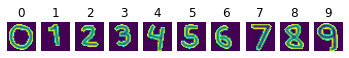

In [14]:
for digit, c in enumerate(classes):
    plt.subplot(1, num_classes, digit + 1)
    plt.imshow(my_x_test[digit])
    plt.axis('off')
    plt.title(c)
plt.show()